In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import classification_report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score

import python_utils as plot
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv("adultdataset.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Any null values?
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
# Modifying data

# Change ? to NaNs
df[df == '?'] = np.nan

# Replace empty values with the mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
# Transform categorical labels into numerical values
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

for feature in categorical:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

In [57]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


AttributeError: module 'seaborn' has no attribute 'plt'

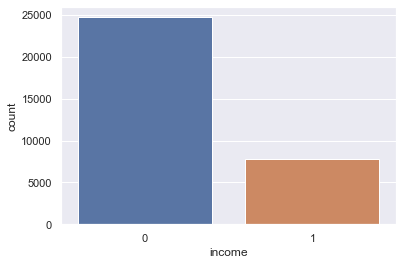

In [56]:
# Count of >50K & <=50K
sns.countplot(df['income'],label="Count")
sns.plt.show()

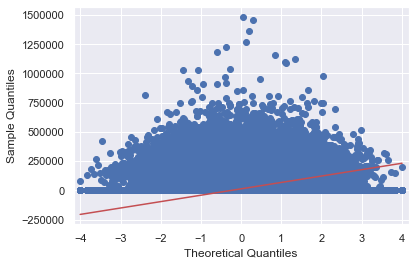

In [14]:
# Performing normality tests

# Plotting qqplot to see if data follows normal distribution (ie, follows the diagonal line)
from statsmodels.graphics.gofplots import qqplot
qqplot(df, line='s')
plt.show()

([array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([14.,  1.,  0., 

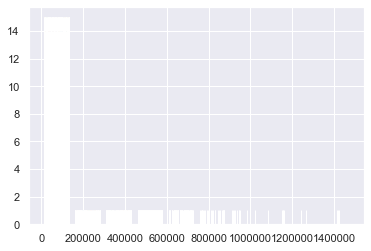

In [15]:
# Visualizing a histogram on dataset
plt.hist(df)

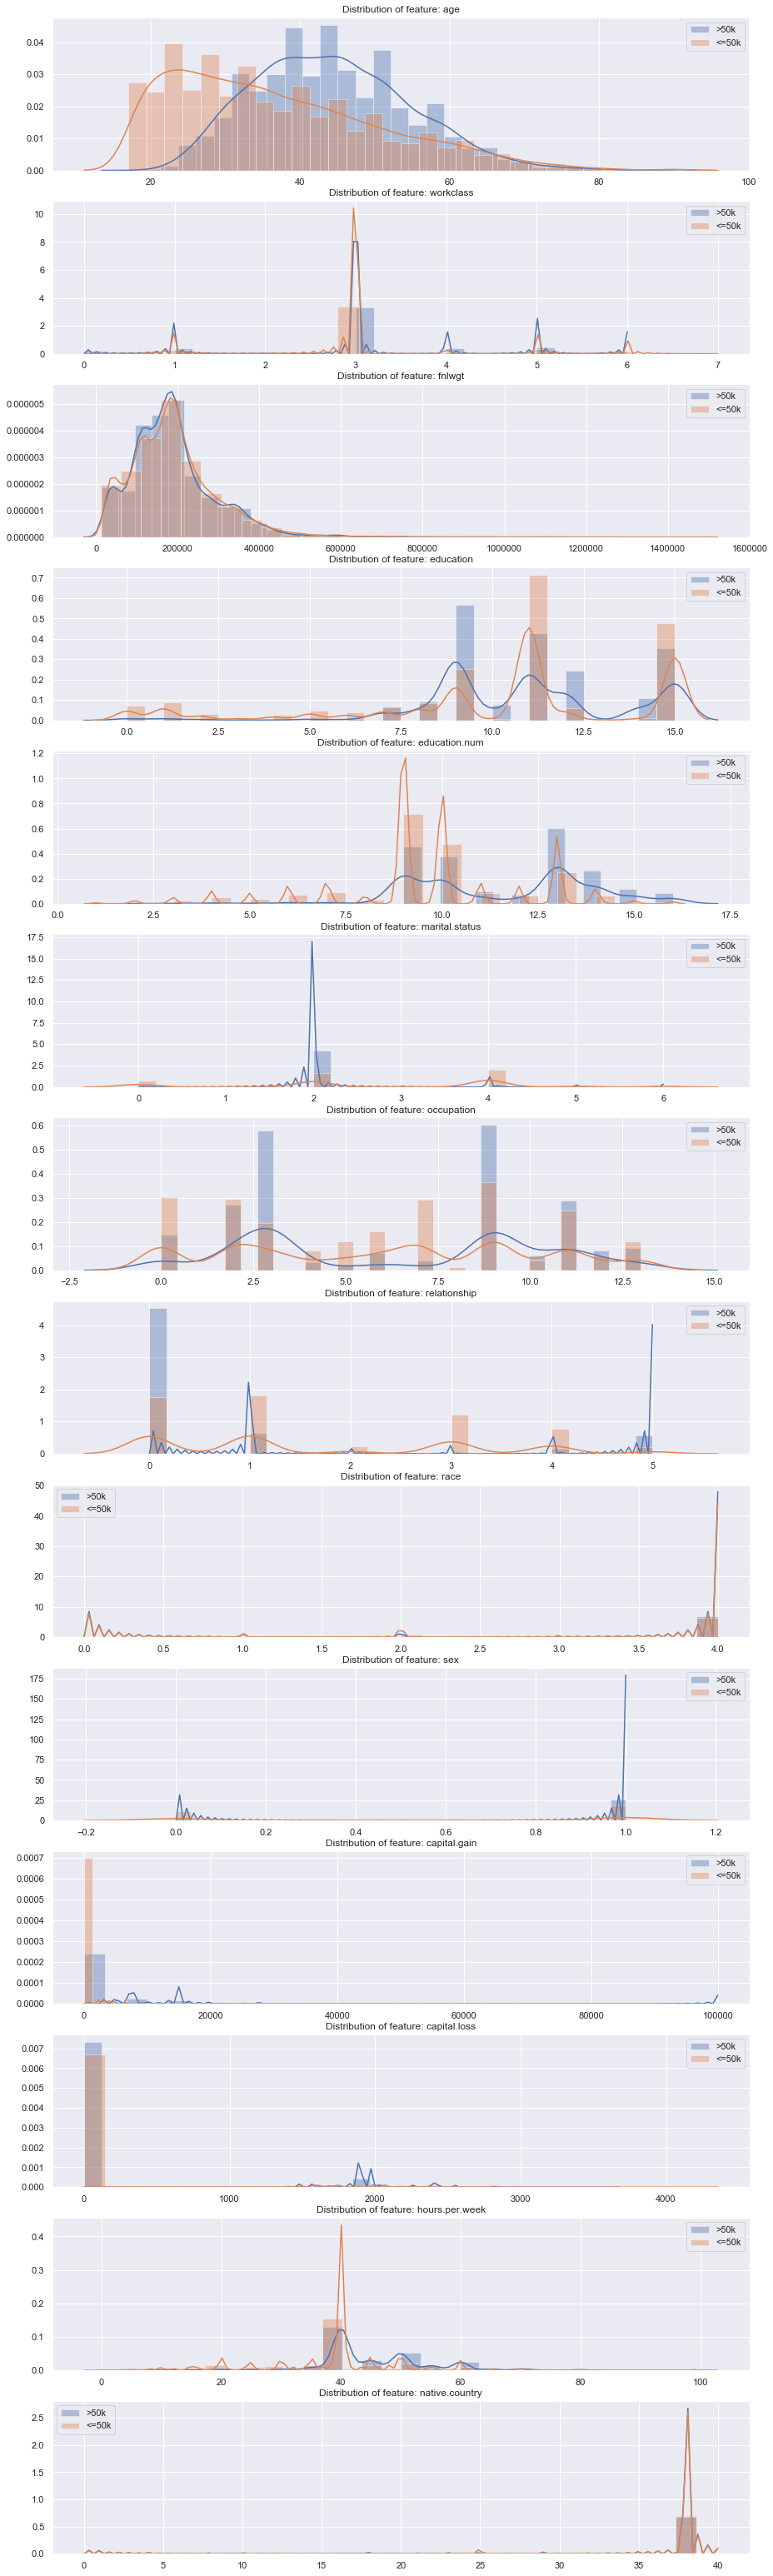

In [16]:
# Feature selection to better differentiate between the classes
features=['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.income==1],bins=30)
    sns.distplot(df[feat][df.income==0],bins=30)
    ax.legend(['>50k', '<=50k'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [17]:
# Splitting target variable from dataset + dropping potentially irrelevant columns
X = df.drop(['workclass', 'fnlwgt', 'education.num', 'race', 'sex', 'capital.loss', 'native.country', 'income'], axis=1)
y = df['income']

# Splitting into a training and testing set, 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardizing values
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [18]:
X_train.head()

,age,education,marital.status,occupation,relationship,capital.gain,hours.per.week
0,0.101484,-0.332263,-0.402341,-0.782234,2.214196,-0.145189,-1.662414
1,0.028248,0.184396,-0.402341,-0.026696,-0.899410,-0.145189,-0.200753
2,0.247956,1.217715,0.926666,-0.782234,-0.276689,-0.145189,-0.038346
3,-0.850587,0.184396,0.926666,-0.530388,0.968753,-0.145189,-0.038346
4,-0.044989,0.442726,-0.402341,-0.782234,-0.899410,-0.145189,-0.038346


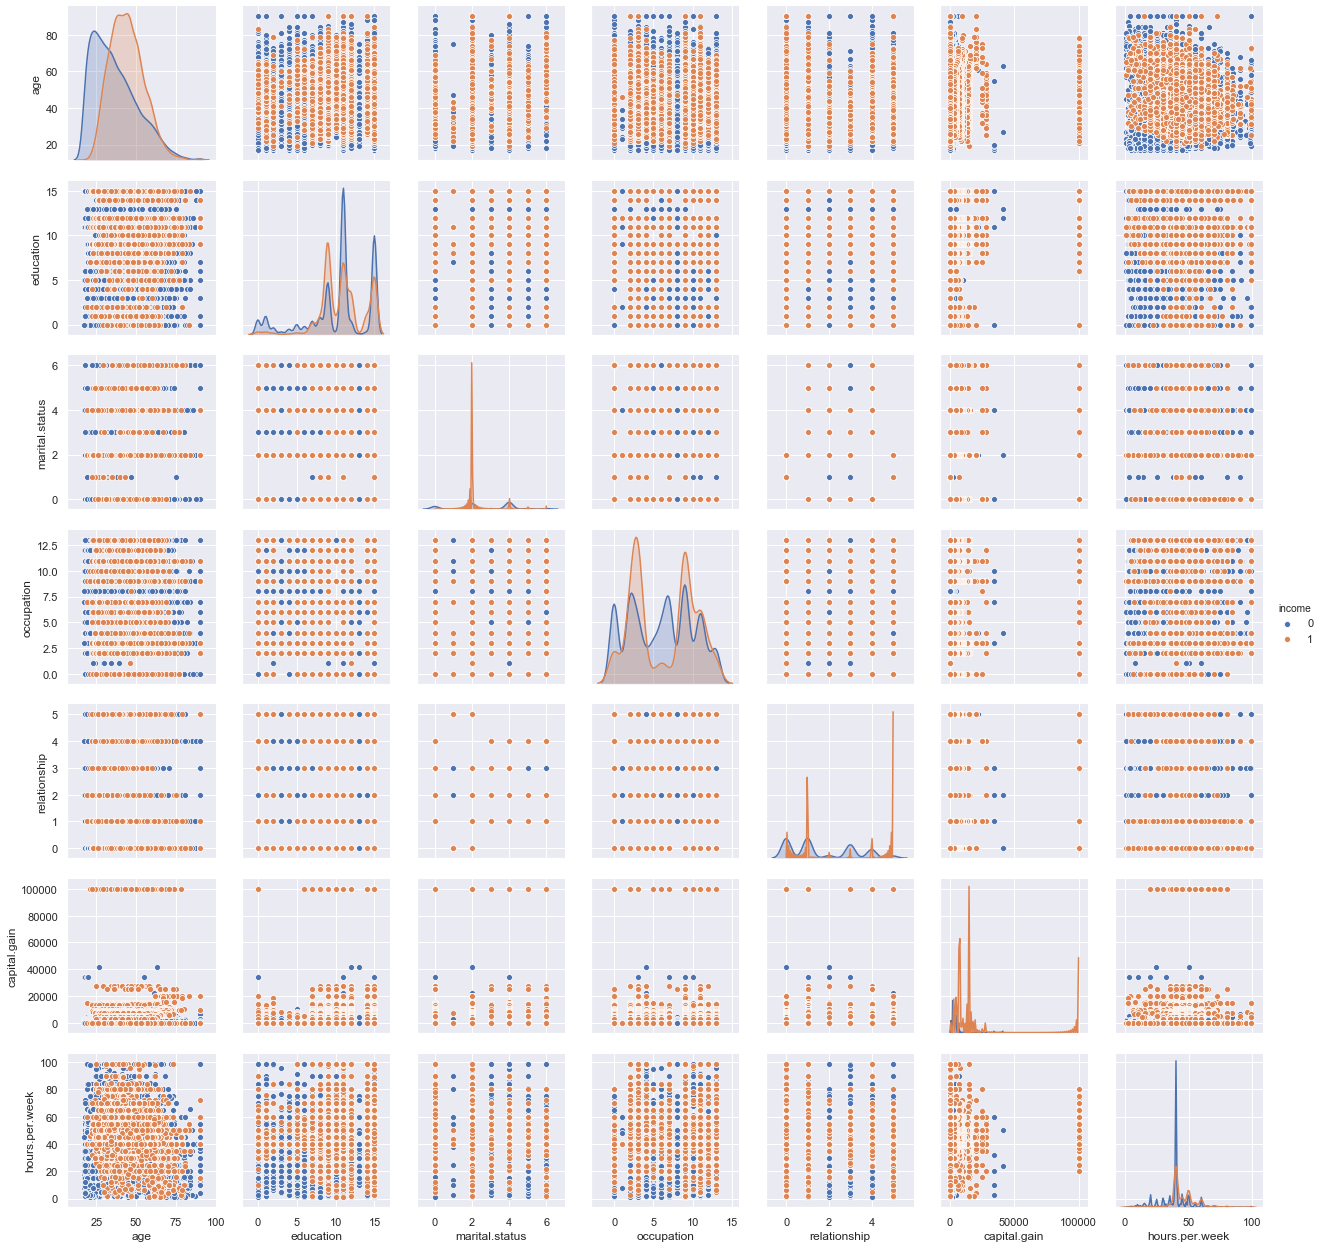

In [22]:
sns.pairplot(df, vars=['age','education', 'marital.status', 'occupation', 'relationship', 'capital.gain', 'hours.per.week'], kind='scatter', hue='income')

In [34]:
# Fit a Gaussian Mixture Model to the training set
clf = mixture.GaussianMixture()
clf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
# kNN = non-Parametric = Superior method?
knnM = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='euclidean')
knnM.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [50]:
# Testing both models
Y_test_predGMM = clf.predict(X_test)
Y_test_predKNN = knnM.predict(X_test)

In [55]:
print('GMM RESULTS')
print('Accuracy: ', accuracy_score(y_test, Y_test_predGMM))
print('Classification report')
print(classification_report(y_test, Y_test_predGMM))
print('Test AUCPR = ' + str(average_precision_score(y_test, Y_test_predGMM)))

print('\nkNN RESULTS')
print('Accuracy: ', accuracy_score(y_test, Y_test_predKNN))
print('Classification report')
print(classification_report(y_test, Y_test_predKNN))
print('Test AUCPR = ' + str(average_precision_score(y_test, Y_test_predKNN)))

GMM RESULTS
Accuracy:  0.7585218548469649
Classification report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7410
           1       0.00      0.00      0.00      2359

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.65      9769

Test AUCPR = 0.24147814515303512

kNN RESULTS
Accuracy:  0.8356024158050978
Classification report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7410
           1       0.72      0.53      0.61      2359

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769

Test AUCPR = 0.49224235559984886
